In [56]:
import pandas as pd

pd.set_option('display.max_columns', None)

df = pd.read_csv('../Data/churn_clean.csv')

In [57]:
target_for_analysis = 'Churn'

### Prepare the Data

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = {'Population','Children','Age','Income','Churn','Outage_sec_perweek' ,'Email','Contacts','Yearly_equip_failure','Techie','Contract',
            'Port_modem','Tablet','Phone','Multiple','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling',
            'PaymentMethod','MonthlyCharge','Bandwidth_GB_Year','Item1','Item2','Item3','Item4','Item5','Item6','Item7','Item8'}


yes_no_columns = ['Techie', 'Contract', 'Port_modem', 'Tablet', 'Phone', 'Multiple', 'OnlineSecurity', 
                  'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
                  'PaymentMethod', 'Churn', 'Contract', 'Techie']
categorical_columns = ['Marital', 'Gender', 'Area', 'InternetService', 'Port_']

columns_to_drop = ['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'TimeZone', 'Job', 'Zip']

categoricals = yes_no_columns + categorical_columns

df = df.drop(columns=columns_to_drop, axis=1)

df = pd.get_dummies(df, drop_first=True)

target_for_analysis = "Churn_Yes"
 
df = df * 1

# Drop columns that have values that won't convert
df = df.dropna(axis=1)

# Create Exog and Endog data frames
X = df.drop(target_for_analysis, axis=1)
y = df[target_for_analysis]

In [60]:
numeric = ['Lat', 'Lng', 'Population', 'Children', 'Age', 'Income',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Item1', 'Item2',
       'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']
cat = ['Area_Suburban',
       'Area_Urban', 'Marital_Married', 'Marital_Never Married',
       'Marital_Separated', 'Marital_Widowed', 'Gender_Male',
       'Gender_Nonbinary', 'Techie_Yes', 'Contract_One year',
       'Contract_Two Year', 'Port_modem_Yes', 'Tablet_Yes',
       'InternetService_Fiber Optic', 'Phone_Yes', 'Multiple_Yes',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'PaperlessBilling_Yes', 'PaymentMethod_Credit Card (automatic)',
       'PaymentMethod_Electronic Check', 'PaymentMethod_Mailed Check']
        

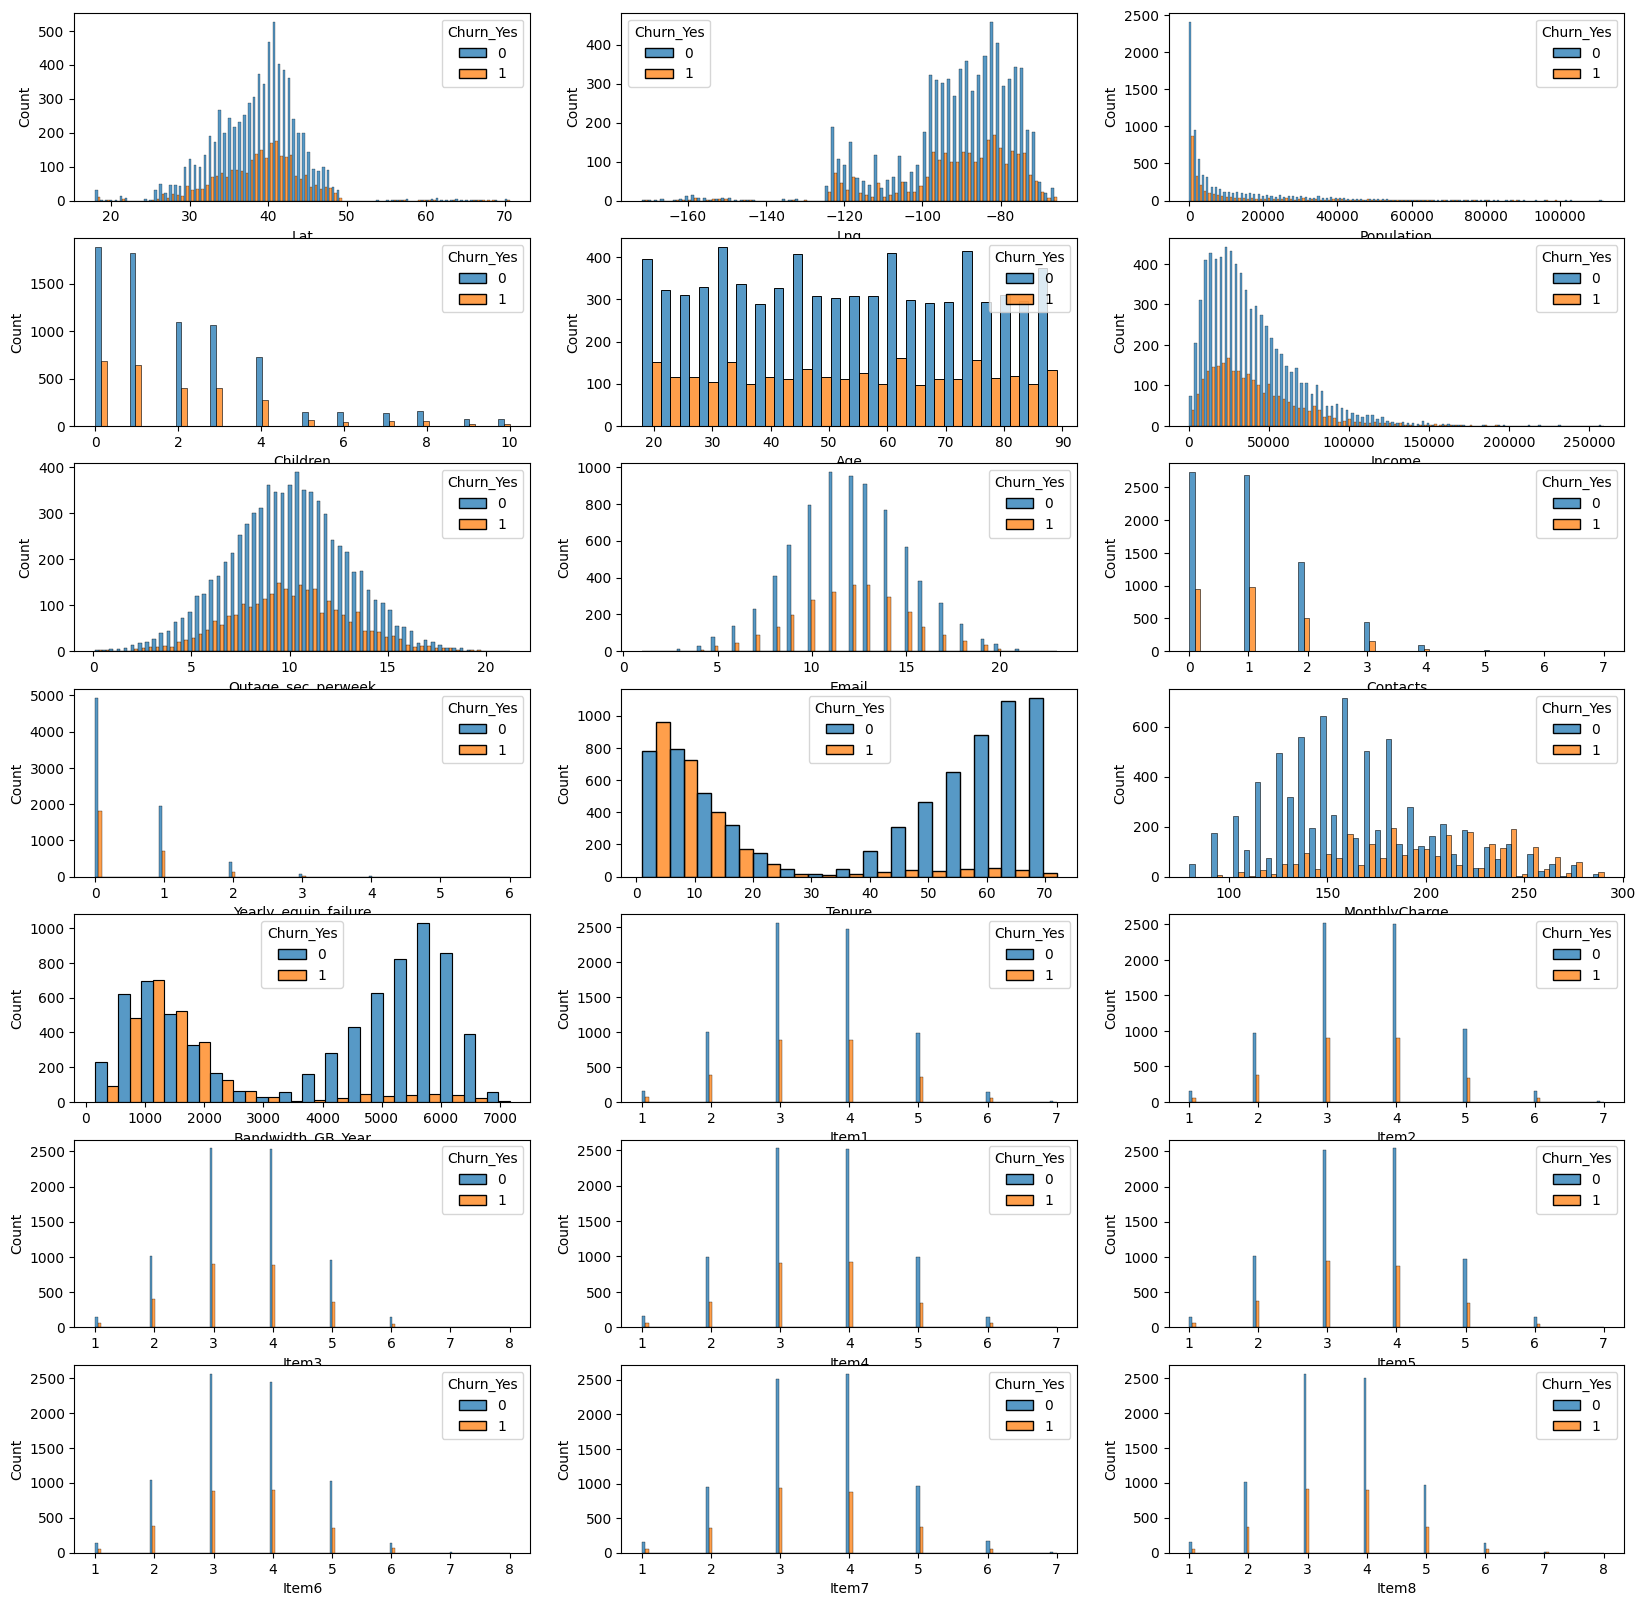

In [61]:
import matplotlib.pyplot as plt
column_count = 3
fig, axis = plt.subplots(len(numeric) // column_count, column_count, figsize=(20, 20))
i = 0
len_axis = len(axis)
for triaxis in axis:
    for sub_axis in triaxis:
            sns.histplot(data=df, multiple="dodge", x=numeric[i], hue=target_for_analysis, ax=sub_axis)
            i = i+1
plt.show()

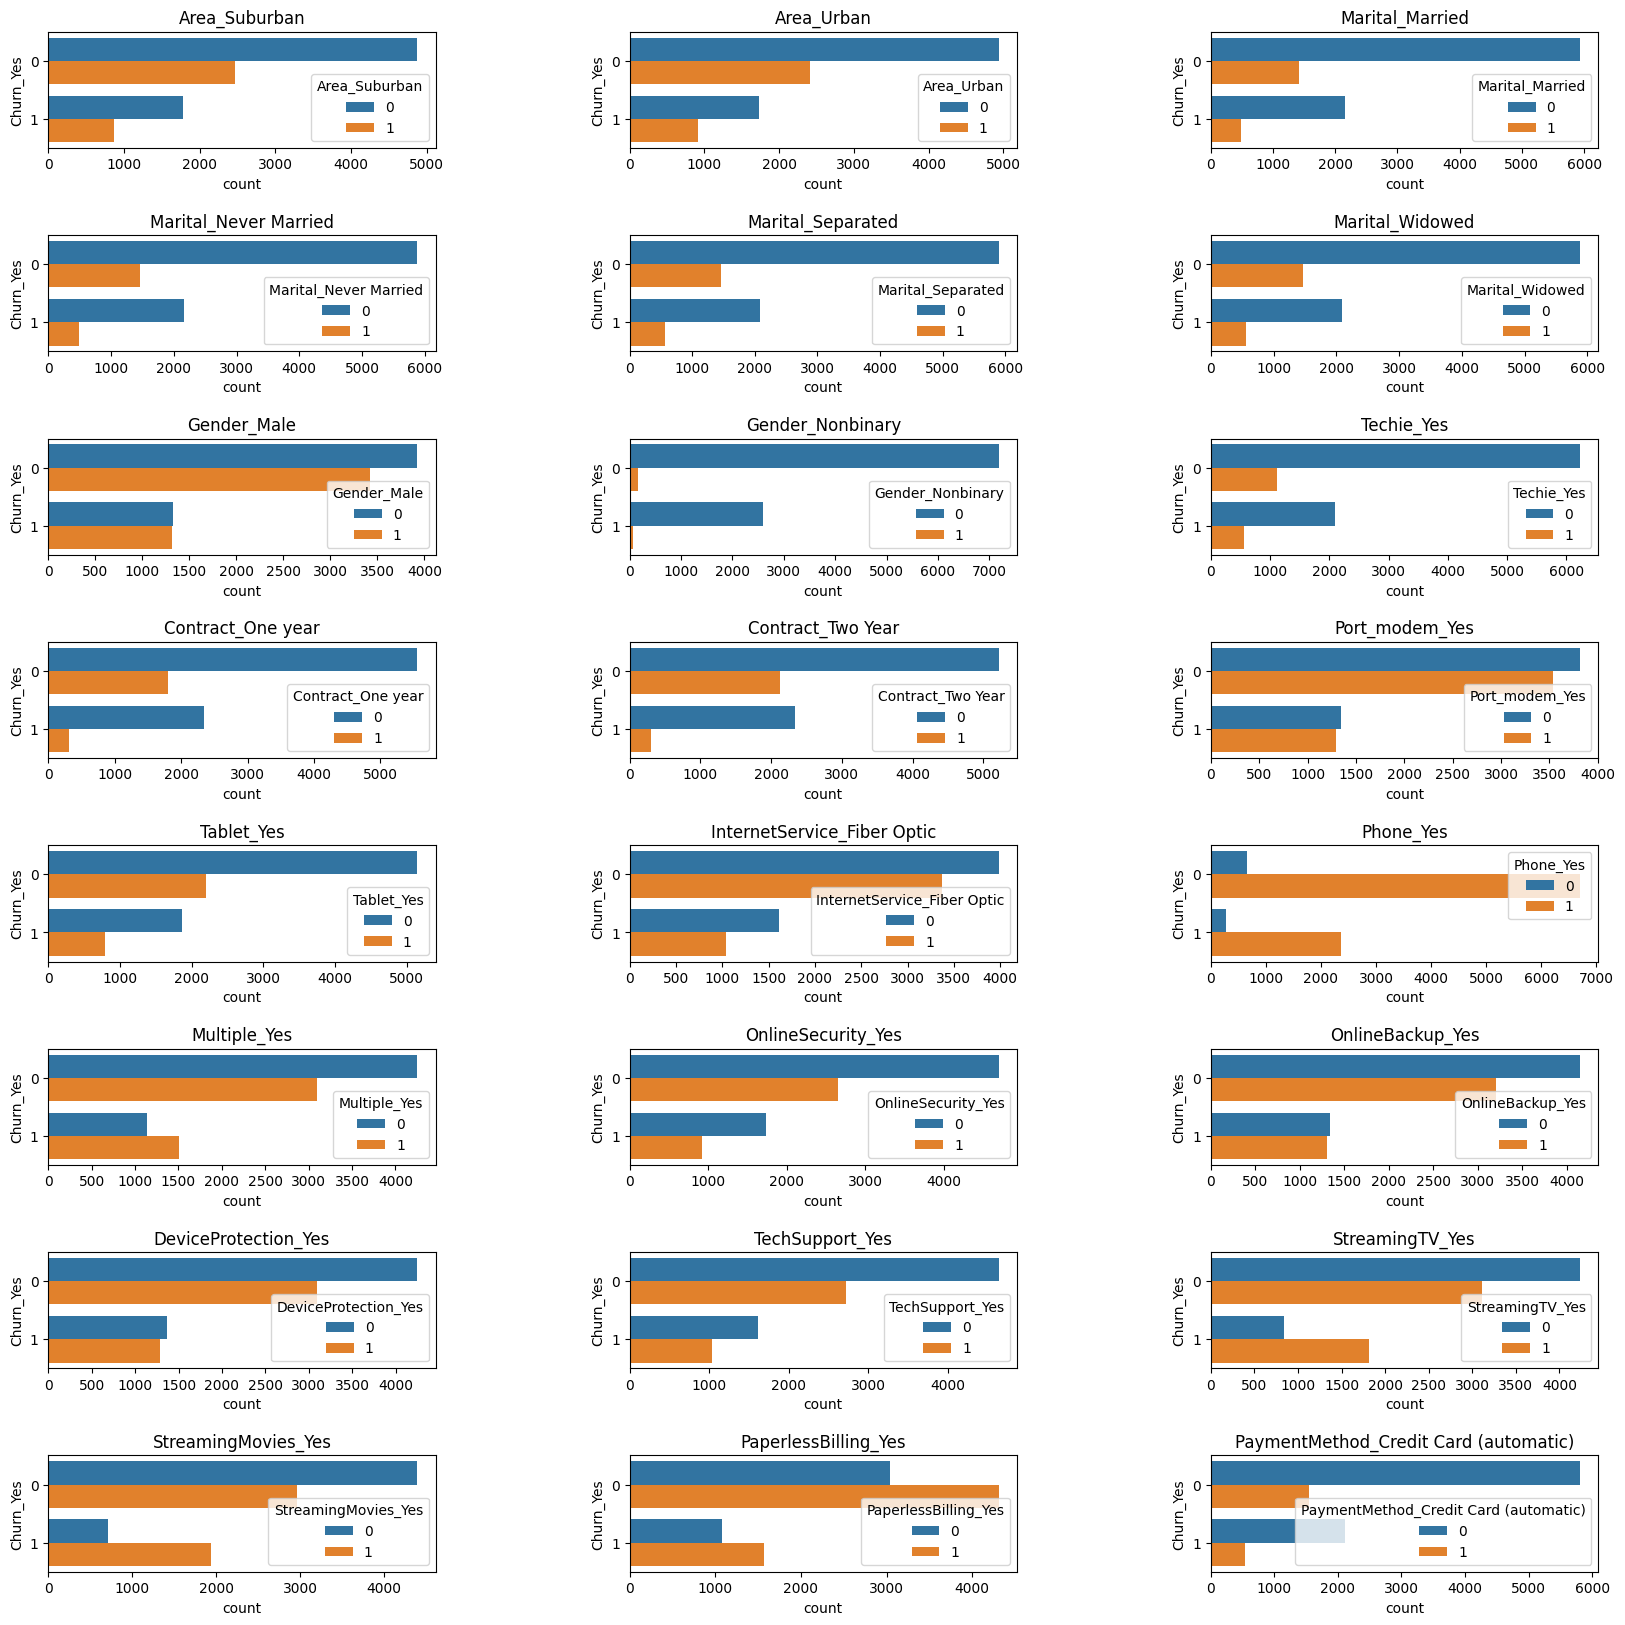

In [62]:
import matplotlib.pyplot as plt
column_count = 3
fig, axis = plt.subplots(len(cat) // column_count, column_count, figsize=(20, 20))
i = 0
len_axis = len(axis)
for triaxis in axis:
    for sub_axis in triaxis:
            plt.subplots_adjust(wspace=0.5, hspace=0.75)
            g = sns.countplot(data = df, y=df[target_for_analysis], ax=sub_axis, hue=cat[i]).set(title=cat[i])
            i = i+1
plt.show()

In [63]:
df.to_csv('./prepared_data.csv', index=False)

In [64]:
X.head()

,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8,Area_Suburban,Area_Urban,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Gender_Male,Gender_Nonbinary,Techie_Yes,Contract_One year,Contract_Two Year,Port_modem_Yes,Tablet_Yes,InternetService_Fiber Optic,Phone_Yes,Multiple_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit Card (automatic),PaymentMethod_Electronic Check,PaymentMethod_Mailed Check
0,56.25100,-133.37571,38,0,68,28561.99,7.978323,10,0,1,6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4,0,1,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,0,0,1,1,1,0,0
1,44.32893,-84.24080,10446,1,27,21704.77,11.699080,12,0,1,1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4,0,1,1,0,0,0,0,0,1,0,0,0,1,1,1,1,1,0,0,0,1,1,1,0,0,0
2,45.35589,-123.24657,3735,4,50,9609.57,10.752800,9,0,1,15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3,0,1,0,0,0,1,0,0,1,0,1,1,0,0,1,1,0,0,0,0,0,1,1,1,0,0
3,32.96687,-117.24798,13863,1,48,18925.23,14.913540,15,2,0,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3,1,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1
4,29.38012,-95.80673,11352,0,83,40074.19,8.147417,16,2,1,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1


In [65]:
stats = X.describe()
rotated = stats.transpose()
for index, row in rotated.iterrows():
    print(f"{row.name} has a mean of {row['mean']}, a std dev of {row['std']}, a min of {row['min']} and a max of {row['max']}. \n")


Lat has a mean of 38.757566993, a std dev of 5.437388642740157, a min of 17.96612 and a max of 70.64066. 

Lng has a mean of -90.78253605799999, a std dev of 15.156141561795243, a min of -171.68815 and a max of -65.66785. 

Population has a mean of 9756.5624, a std dev of 14432.698670761416, a min of 0.0 and a max of 111850.0. 

Children has a mean of 2.0877, a std dev of 2.1472004463896, a min of 0.0 and a max of 10.0. 

Age has a mean of 53.0784, a std dev of 20.698881559393033, a min of 18.0 and a max of 89.0. 

Income has a mean of 39806.926771, a std dev of 28199.916701686827, a min of 348.67 and a max of 258900.7. 

Outage_sec_perweek has a mean of 10.0018481577654, a std dev of 2.9760191880722138, a min of 0.09974694 and a max of 21.20723. 

Email has a mean of 12.016, a std dev of 3.025898148642911, a min of 1.0 and a max of 23.0. 

Contacts has a mean of 0.9942, a std dev of 0.9884655109849007, a min of 0.0 and a max of 7.0. 

Yearly_equip_failure has a mean of 0.398, a std de

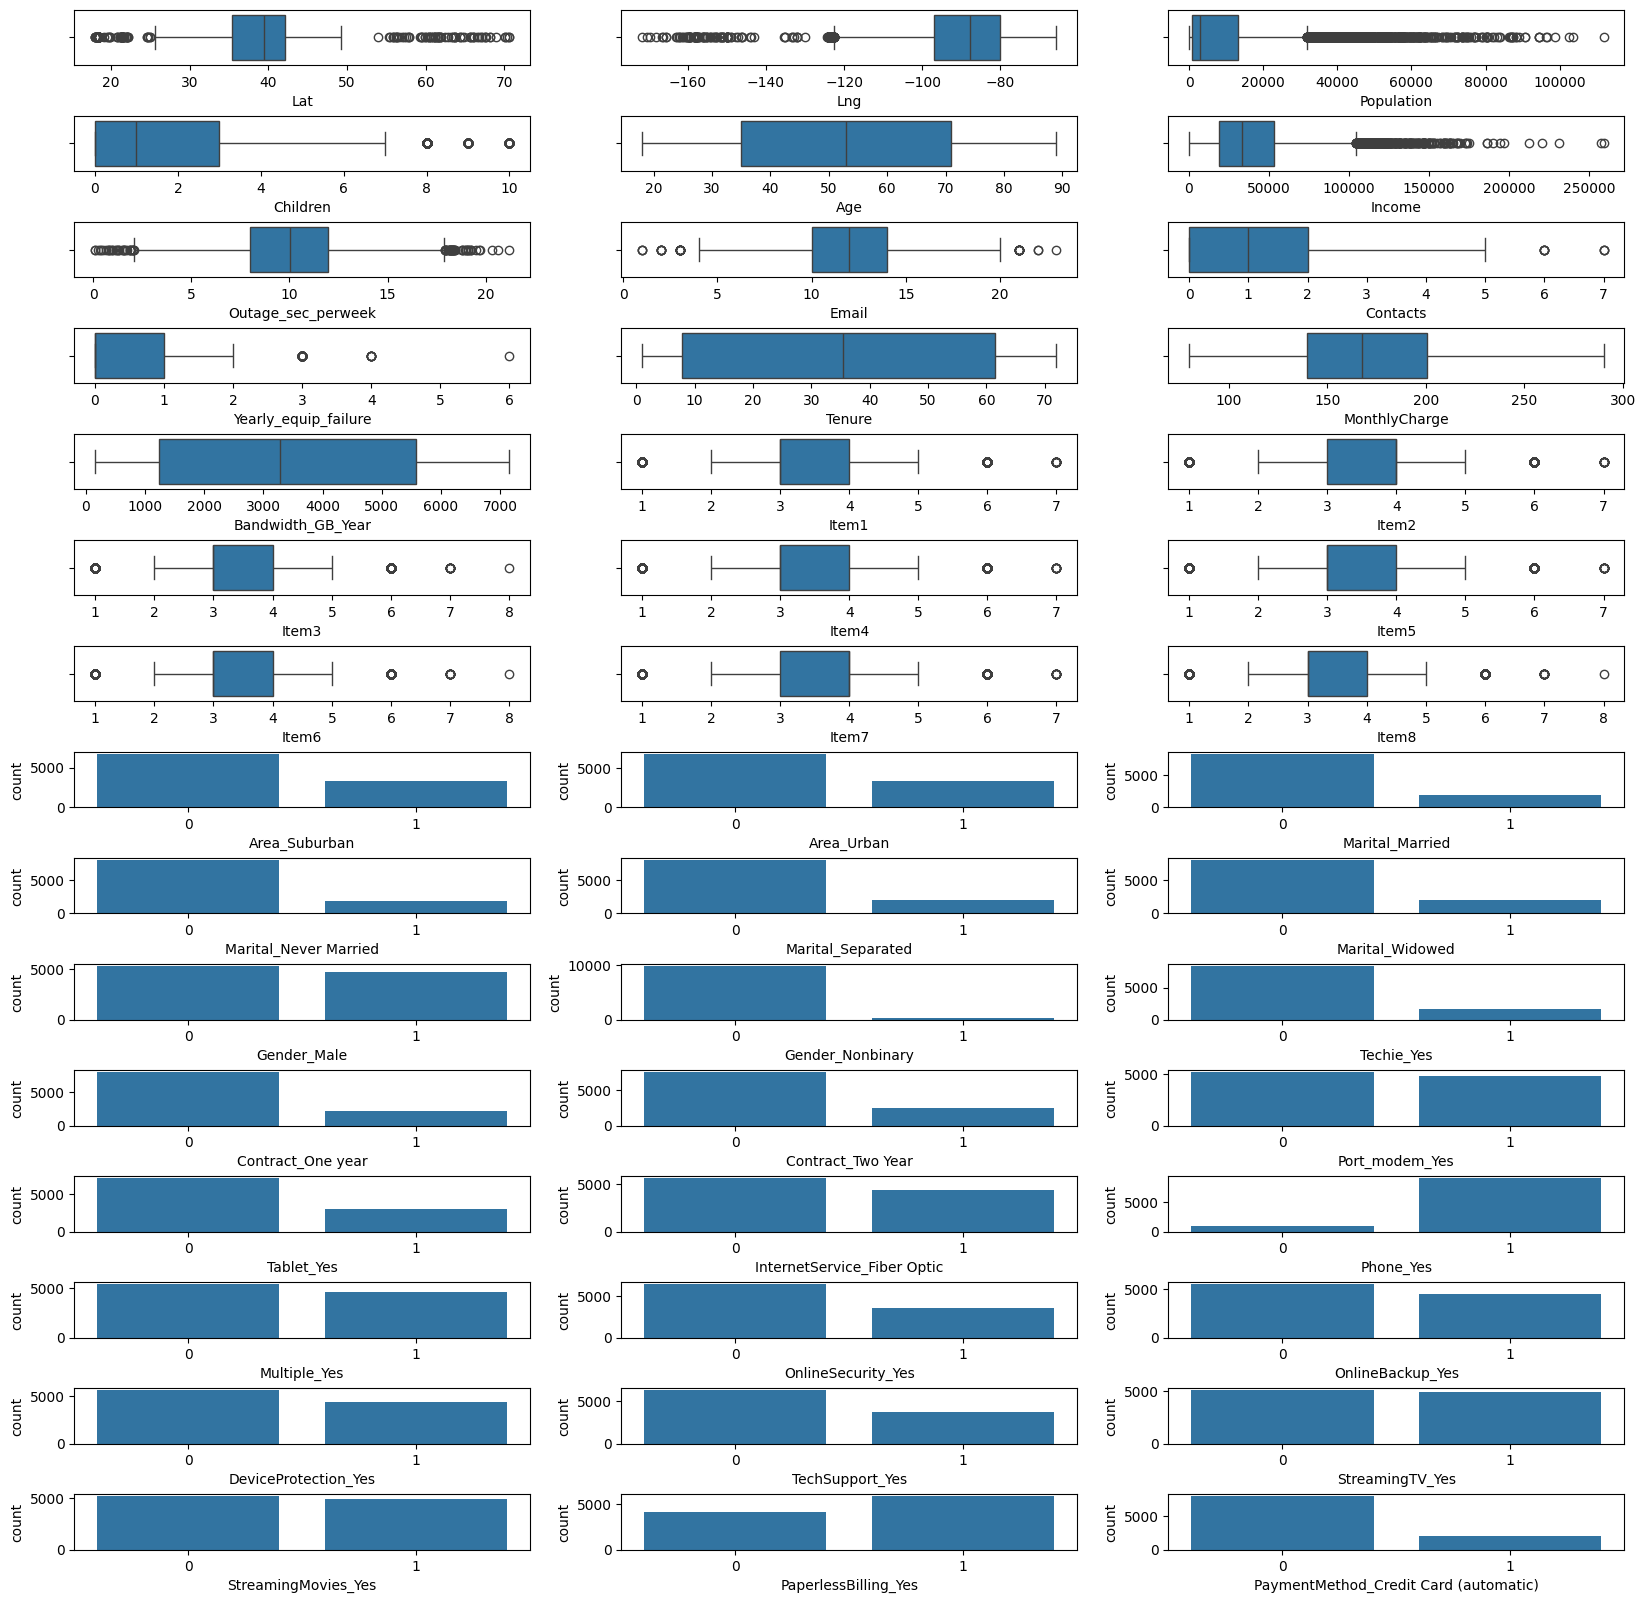

In [66]:

import matplotlib.pyplot as plt
column_count = 3
fig, axis = plt.subplots(len(X.columns) // column_count, column_count, figsize=(20, 20))
i = 0
len_axis = len(axis)
for triaxis in axis:
    for sub_axis in triaxis:
            index = X.columns[i].find("_")
            substring = X.columns[i][:index]
            plt.subplots_adjust(hspace=0.9)
            if index >= 0 and substring in categoricals or "Port" in substring:
                sns.countplot(data=df, ax=sub_axis, x=X.columns[i])
            else: 
                sns.boxplot(data = df, ax=sub_axis, x=X.columns[i])
            i = i+1
plt.show()

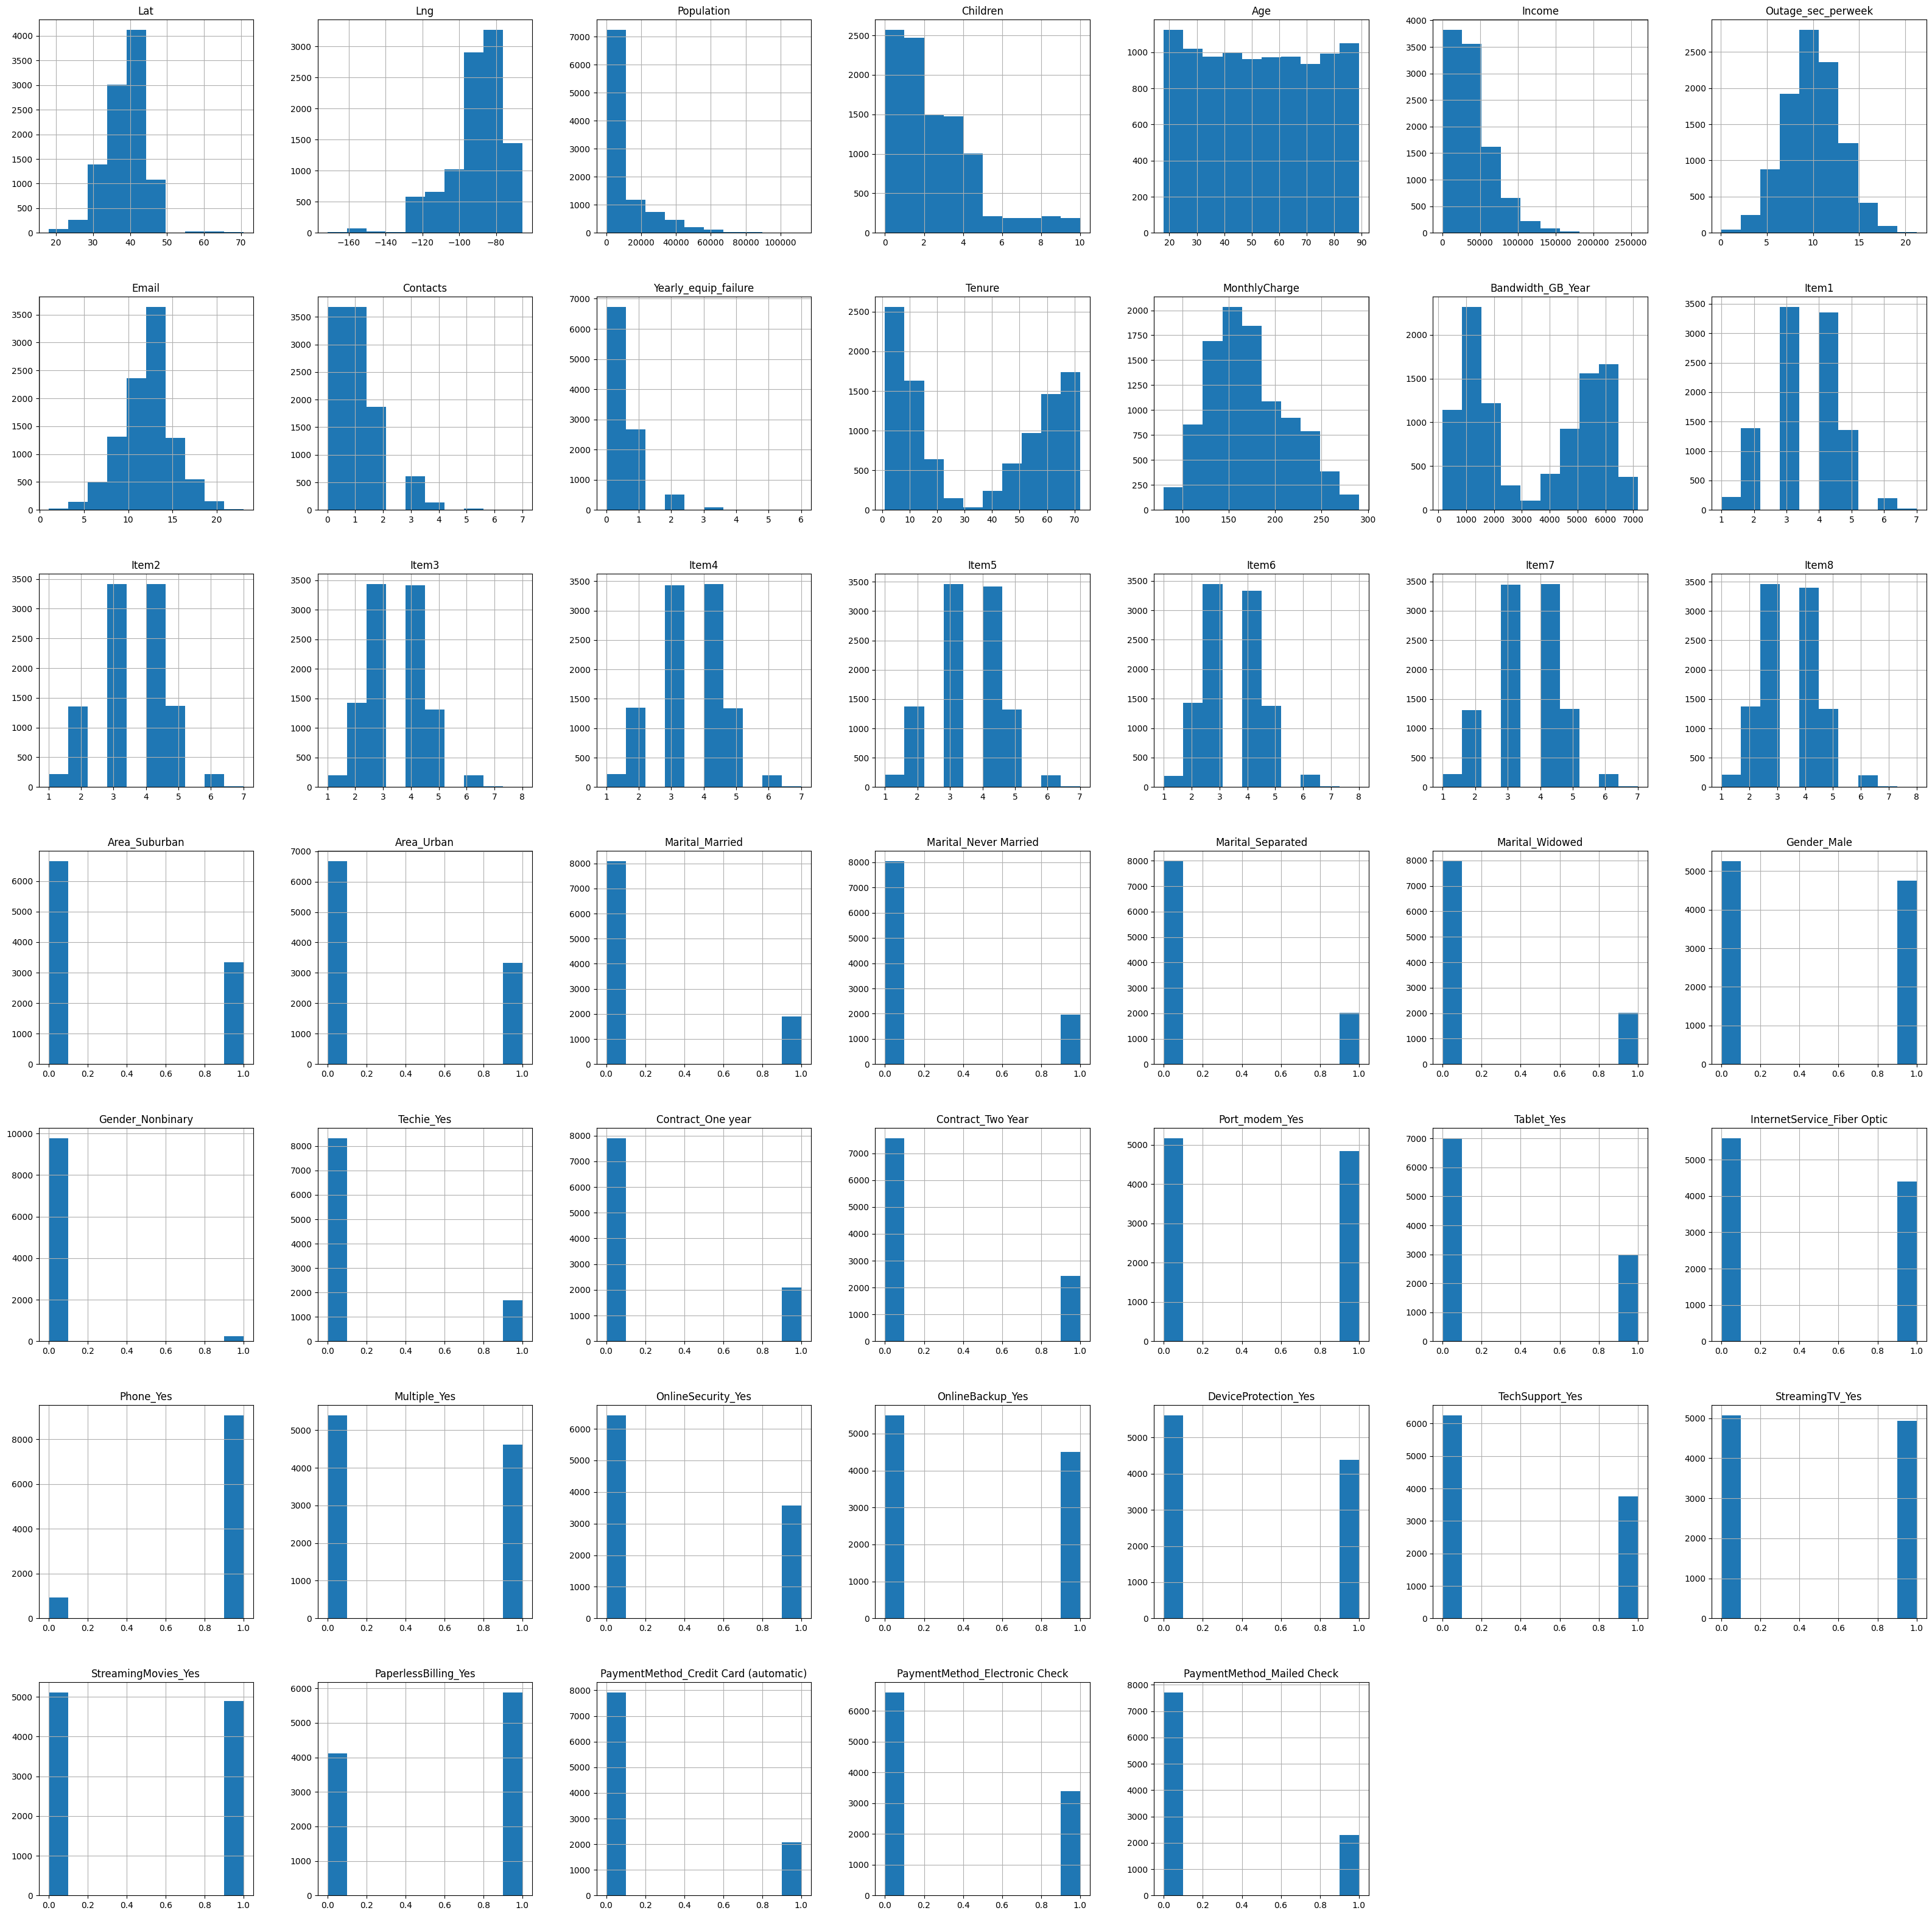

In [67]:
X.hist(figsize=(40,40))
plt.show()

In [68]:
import statsmodels.api as sm

target = numeric + cat

endog= df[target_for_analysis]
exog = df[target]
model = sm.Logit(endog, exog)
result = model.fit()

result.summary()

Optimization terminated successfully.
         Current function value: 0.221122
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Churn_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9953
Method:                           MLE   Df Model:                           46
Date:                Sun, 31 Mar 2024   Pseudo R-squ.:                  0.6176
Time:                        09:40:29   Log-Likelihood:                -2211.2
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Lat                                      -0.0213      0.007     -3.238      0.001      -0.034      -0.008
Lng                                       0.0048      0.002      1.994      0.046    8.24e-05       0.010
Population                            -2.445e-06   2.78e-06     -0.881      0.379   -7.89e-06       3e-06
Children                                 -0.0871      0.020     -4.285      0.000      -0.127      -0.047
Age                                       0.0078      0.002      3.581      0.000       0.004       0.012
Income                                -5.099e-07   1.36e-06     -0.374      0.708   -3.18e-06    2.16e-06
Outage_sec_perweek                       -0.0294      0.013     -2.335      0.020      -0.054      -0.005
Email                                    -0.0369      0.012     -3.005      0.003      -0.061      -0.013
Contacts                                  0.0412      0.039      1.069      0.285      -0.034       0.117
Yearly_equip_failure                     -0.0715      0.061     -1.179      0.239      -0.190       0.047
Tenure                                   -0.3560      0.027    -13.037      0.000      -0.410      -0.303
MonthlyCharge                             0.0127      0.005      2.729      0.006       0.004       0.022
Bandwidth_GB_Year                         0.0030      0.000      9.049      0.000       0.002       0.004
Item1                                    -0.0255      0.054     -0.470      0.638      -0.132       0.081
Item2                                    -0.0051      0.052     -0.098      0.922      -0.106       0.096
Item3                                    -0.0091      0.047     -0.196      0.845      -0.100       0.082
Item4                                    -0.1278      0.040     -3.170      0.002      -0.207      -0.049
Item5                                    -0.1851      0.041     -4.520      0.000      -0.265      -0.105
Item6                                    -0.0571      0.045     -1.274      0.203      -0.145       0.031
Item7                                    -0.0525      0.042     -1.239      0.215      -0.135       0.031
Item8                                    -0.0569      0.040     -1.430      0.153      -0.135       0.021
Area_Suburban                            -0.1285      0.094     -1.361      0.173      -0.314       0.057
Area_Urban                               -0.0119      0.093     -0.128      0.898      -0.195       0.171
Marital_Married                           0.0288      0.120      0.239      0.811      -0.207       0.265
Marital_Never Married                    -0.0878      0.120     -0.730      0.465      -0.323       0.148
Marital_Separated                         0.0140      0.119      0.118      0.906      -0.219       0.247
Marital_Widowed                           0.1421      0.119      1.198      0.231      -0.090       0.374
Gender_Male                               0.0248      0.080  

In [69]:
import statsmodels.api as sm

target = numeric + cat

endog= df[target_for_analysis]
exog = df[target]

model = sm.Logit(endog, exog)
result = model.fit()

result.summary()

Optimization terminated successfully.
         Current function value: 0.221122
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Churn_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9953
Method:                           MLE   Df Model:                           46
Date:                Sun, 31 Mar 2024   Pseudo R-squ.:                  0.6176
Time:                        09:40:29   Log-Likelihood:                -2211.2
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Lat                                      -0.0213      0.007     -3.238      0.001      -0.034      -0.008
Lng                                       0.0048      0.002      1.994      0.046    8.24e-05       0.010
Population                            -2.445e-06   2.78e-06     -0.881      0.379   -7.89e-06       3e-06
Children                                 -0.0871      0.020     -4.285      0.000      -0.127      -0.047
Age                                       0.0078      0.002      3.581      0.000       0.004       0.012
Income                                -5.099e-07   1.36e-06     -0.374      0.708   -3.18e-06    2.16e-06
Outage_sec_perweek                       -0.0294      0.013     -2.335      0.020      -0.054      -0.005
Email                                    -0.0369      0.012     -3.005      0.003      -0.061      -0.013
Contacts                                  0.0412      0.039      1.069      0.285      -0.034       0.117
Yearly_equip_failure                     -0.0715      0.061     -1.179      0.239      -0.190       0.047
Tenure                                   -0.3560      0.027    -13.037      0.000      -0.410      -0.303
MonthlyCharge                             0.0127      0.005      2.729      0.006       0.004       0.022
Bandwidth_GB_Year                         0.0030      0.000      9.049      0.000       0.002       0.004
Item1                                    -0.0255      0.054     -0.470      0.638      -0.132       0.081
Item2                                    -0.0051      0.052     -0.098      0.922      -0.106       0.096
Item3                                    -0.0091      0.047     -0.196      0.845      -0.100       0.082
Item4                                    -0.1278      0.040     -3.170      0.002      -0.207      -0.049
Item5                                    -0.1851      0.041     -4.520      0.000      -0.265      -0.105
Item6                                    -0.0571      0.045     -1.274      0.203      -0.145       0.031
Item7                                    -0.0525      0.042     -1.239      0.215      -0.135       0.031
Item8                                    -0.0569      0.040     -1.430      0.153      -0.135       0.021
Area_Suburban                            -0.1285      0.094     -1.361      0.173      -0.314       0.057
Area_Urban                               -0.0119      0.093     -0.128      0.898      -0.195       0.171
Marital_Married                           0.0288      0.120      0.239      0.811      -0.207       0.265
Marital_Never Married                    -0.0878      0.120     -0.730      0.465      -0.323       0.148
Marital_Separated                         0.0140      0.119      0.118      0.906      -0.219       0.247
Marital_Widowed                           0.1421      0.119      1.198      0.231      -0.090       0.374
Gender_Male                               0.0248      0.080  

## Reduce the features by P-Value

In [70]:
columns = set(target)

p_values = result.pvalues.copy()
p_values.sort_values(ascending=False, inplace=True)

In [71]:
print(*p_values)
print(*p_values.keys())

0.9220390060513517 0.9062767175912462 0.8984129309774919 0.8754753608204693 0.8448949106131974 0.8108833338589823 0.755757169618448 0.7549802640163433 0.7082872825583111 0.638441556531621 0.46521945008843446 0.3810954341516337 0.3785567007017898 0.2849555296013616 0.26060921770903156 0.2422675070454836 0.2385588489851247 0.23078333468343393 0.21544850960755157 0.20282043680388018 0.19077844403226396 0.17349777773934516 0.15728700250735758 0.15259100248117735 0.09905583892043508 0.08527525017978613 0.04616130854133991 0.037372929640876594 0.01954777862679671 0.006360155553131315 0.002655075203303313 0.001526090009324778 0.0012030058489318708 0.00034185455992692665 3.904387108314054e-05 1.8285561351982363e-05 6.182722587955381e-06 2.9032082419962125e-07 1.7834022693402113e-07 9.119259225782615e-10 3.258051462950914e-18 1.4417969698823638e-19 8.607310079518865e-20 1.0689351665177756e-25 7.550083470503612e-39 3.1123911160154633e-158 1.1705468446578625e-172
Item2 Marital_Separated Area_Urba

In [72]:
alpha = 0.05

while (p_values.iloc[0] > alpha):
    columns.remove(p_values.keys()[0])
    endog= df[target_for_analysis]
    exog = df[list(columns)]
    model = sm.Logit(endog, exog)
    result = model.fit()
    p_values = result.pvalues.sort_values(ascending=False)

result.summary()

Optimization terminated successfully.
         Current function value: 0.221123
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.221123
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.221124
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.221125
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.221128
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.221130
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.221135
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.221141
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.221148
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.221176
  

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Churn_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9977
Method:                           MLE   Df Model:                           22
Date:                Sun, 31 Mar 2024   Pseudo R-squ.:                  0.6155
Time:                        09:40:32   Log-Likelihood:                -2223.5
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
OnlineSecurity_Yes                -0.4269      0.082     -5.198      0.000      -0.588      -0.266
InternetService_Fiber Optic       -0.4346      0.160     -2.714      0.007      -0.748      -0.121
Multiple_Yes                       0.9765      0.127      7.684      0.000       0.727       1.226
Phone_Yes                         -0.5421      0.127     -4.265      0.000      -0.791      -0.293
StreamingMovies_Yes                2.1108      0.176     12.007      0.000       1.766       2.455
PaymentMethod_Electronic Check     0.4242      0.080      5.270      0.000       0.266       0.582
Contract_Two Year                 -3.4371      0.122    -28.068      0.000      -3.677      -3.197
Contract_One year                 -3.3725      0.125    -26.881      0.000      -3.618      -3.127
StreamingTV_Yes                    1.6522      0.147     11.211      0.000       1.363       1.941
Item6                             -0.1125      0.038     -2.971      0.003      -0.187      -0.038
MonthlyCharge                      0.0129      0.003      3.859      0.000       0.006       0.019
Lng                                0.0052      0.002      2.213      0.027       0.001       0.010
Bandwidth_GB_Year                  0.0029      0.000      9.810      0.000       0.002       0.003
Email                             -0.0368      0.012     -3.039      0.002      -0.061      -0.013
Item5                             -0.1858      0.039     -4.763      0.000      -0.262      -0.109
OnlineBackup_Yes                   0.2017      0.100      2.011      0.044       0.005       0.398
Techie_Yes                         1.0717      0.102     10.531      0.000       0.872       1.271
Item4                             -0.1384      0.039     -3.523      0.000      -0.215      -0.061
Outage_sec_perweek                -0.0312      0.012     -2.513      0.012      -0.056      -0.007
Children                          -0.0869      0.020     -4.373      0.000      -0.126      -0.048
Lat                               -0.0211      0.006     -3.377      0.001      -0.033      -0.009
Age                                0.0074      0.002      3.526      0.000       0.003       0.012
Tenure                            -0.3496      0.025    -14.122      0.000      -0.398      -0.301
==================================================================================================
"""

In [73]:
print(*columns)

OnlineSecurity_Yes InternetService_Fiber Optic Multiple_Yes Phone_Yes StreamingMovies_Yes PaymentMethod_Electronic Check Contract_Two Year Contract_One year StreamingTV_Yes Item6 MonthlyCharge Lng Bandwidth_GB_Year Email Item5 OnlineBackup_Yes Techie_Yes Item4 Outage_sec_perweek Children Lat Age Tenure


In [74]:
from sklearn.metrics import confusion_matrix

# Split the data into features and target
X = df[list(columns)]
y = df[target_for_analysis]

# Make predictions on the data
y_pred = result.predict(X)

y_pred_rounded = [round(x) for x in y_pred]

In [75]:

# Create the confusion matrix
cm = confusion_matrix(y, y_pred_rounded)

# Print the confusion matrix
print(cm)

[[6887  463]
 [ 523 2127]]


In [76]:
from sklearn.metrics import accuracy_score

score =accuracy_score(y,y_pred_rounded)
print(f"Accuracy Score: {score}")

Accuracy Score: 0.9014


In [77]:
print(result.params.sort_values(ascending=True))

Contract_Two Year                -3.437135
Contract_One year                -3.372525
Phone_Yes                        -0.542141
InternetService_Fiber Optic      -0.434648
OnlineSecurity_Yes               -0.426941
Tenure                           -0.349645
Item5                            -0.185819
Item4                            -0.138424
Item6                            -0.112504
Children                         -0.086879
Email                            -0.036802
Outage_sec_perweek               -0.031231
Lat                              -0.021147
Bandwidth_GB_Year                 0.002887
Lng                               0.005241
Age                               0.007410
MonthlyCharge                     0.012863
OnlineBackup_Yes                  0.201704
PaymentMethod_Electronic Check    0.424176
Multiple_Yes                      0.976463
Techie_Yes                        1.071666
StreamingTV_Yes                   1.652183
StreamingMovies_Yes               2.110798
dtype: floa

In [78]:
forumla = "f(x) = "
for name, param in result.params.items():
    temp = f"({name} * {param}) + "
    forumla += temp
print(forumla)

f(x) = (OnlineSecurity_Yes * -0.42694105901821044) + (InternetService_Fiber Optic * -0.43464815950481905) + (Multiple_Yes * 0.9764627365578199) + (Phone_Yes * -0.5421410856291153) + (StreamingMovies_Yes * 2.1107981690516384) + (PaymentMethod_Electronic Check * 0.4241764480004849) + (Contract_Two Year * -3.4371350323638943) + (Contract_One year * -3.372525381368658) + (StreamingTV_Yes * 1.6521825927462668) + (Item6 * -0.11250369656723562) + (MonthlyCharge * 0.012862584679801631) + (Lng * 0.005241187178887246) + (Bandwidth_GB_Year * 0.0028871278282044917) + (Email * -0.03680215655820704) + (Item5 * -0.18581858775572352) + (OnlineBackup_Yes * 0.2017044448144716) + (Techie_Yes * 1.0716658635892655) + (Item4 * -0.1384239348807863) + (Outage_sec_perweek * -0.031230704692404822) + (Children * -0.08687881332716194) + (Lat * -0.021146725468834126) + (Age * 0.007410333923294471) + (Tenure * -0.3496449094845078) + 


In [79]:
template = "In the context of this model for every 1 value increase to to the feature {0}, the chance of churn changes by about {1}% "
for name, param in result.params.items():
    print(template.format(name, param * 100))

In the context of this model for every 1 value increase to to the feature OnlineSecurity_Yes, the chance of churn changes by about -42.69410590182105% 
In the context of this model for every 1 value increase to to the feature InternetService_Fiber Optic, the chance of churn changes by about -43.464815950481906% 
In the context of this model for every 1 value increase to to the feature Multiple_Yes, the chance of churn changes by about 97.646273655782% 
In the context of this model for every 1 value increase to to the feature Phone_Yes, the chance of churn changes by about -54.214108562911534% 
In the context of this model for every 1 value increase to to the feature StreamingMovies_Yes, the chance of churn changes by about 211.07981690516385% 
In the context of this model for every 1 value increase to to the feature PaymentMethod_Electronic Check, the chance of churn changes by about 42.417644800048485% 
In the context of this model for every 1 value increase to to the feature Contract